In [1]:
from pycap import PropertyTree, CyclicChargeDischarge, Charge
import sys
sys.path.append('/notebooks')
from battery import Dualfoil
from matplotlib import pyplot
from pycap import initialize_data, plot_data
from pickle import dump, load
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
file_path = '/notebooks/docker/dualfoil5-1/'
df = Dualfoil(path=file_path)
v = df.get_voltage()

In [3]:
ptree = PropertyTree()
ptree.put_string('start_with', 'discharge')
ptree.put_int('cycles', 15)
ptree.put_double('time_step', 10)
ptree.put_string('discharge_mode', 'constant_current')
ptree.put_double('discharge_current', 5)
ptree.put_string('discharge_stop_at_1', 'voltage_less_than')
ptree.put_double('discharge_voltage_limit', v-0.02)
ptree.put_string('charge_mode', 'constant_current')
ptree.put_double('charge_current', 5)
ptree.put_string('charge_stop_at_1', 'voltage_greater_than')
ptree.put_double('charge_voltage_limit', v+0.02)

# to get the device to a realistic state before the cyclic charge-discharge
init_ptree = PropertyTree()
init_ptree.put_double('time_step', 15)
init_ptree.put_string('charge_mode', 'potentiostatic')
init_ptree.put_double('charge_voltage', v)
init_ptree.put_string('charge_stop_at_1', 'current_less_than')
init_ptree.put_double('charge_current_limit', 0.5)

In [4]:
df.reset()
init_data = initialize_data()

init_exp = Charge(init_ptree)
%time init_exp.run(df, init_data)


CPU times: user 160 ms, sys: 100 ms, total: 260 ms
Wall time: 8.93 s


16

In [5]:
data = initialize_data()

ccd = CyclicChargeDischarge(ptree)
%time ccd.run(df, data)

CPU times: user 17.9 s, sys: 33.6 s, total: 51.5 s
Wall time: 35min 42s


2919

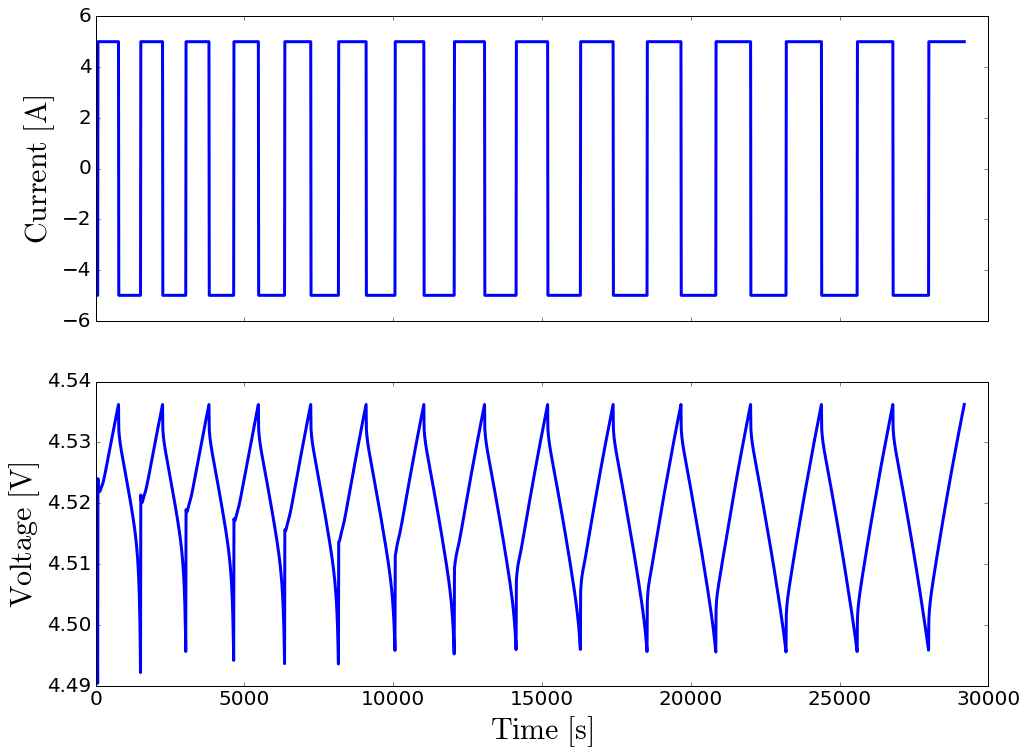

In [6]:
plot_data(data)

In [7]:
dump(data, open('data_dumps/stacked_c_dc6.dat', 'wb'))

In [8]:
with open('data_dumps/stacked_c_dc_notes', 'a') as fnotes:
    fnotes.write('6\n\tCharge : 05amp\tDischarge : 05amp\tV-range : 0.04V\n')
    fnotes.write('Cycles : 15\n\n')

In [21]:
df.outbot.write_main_output()

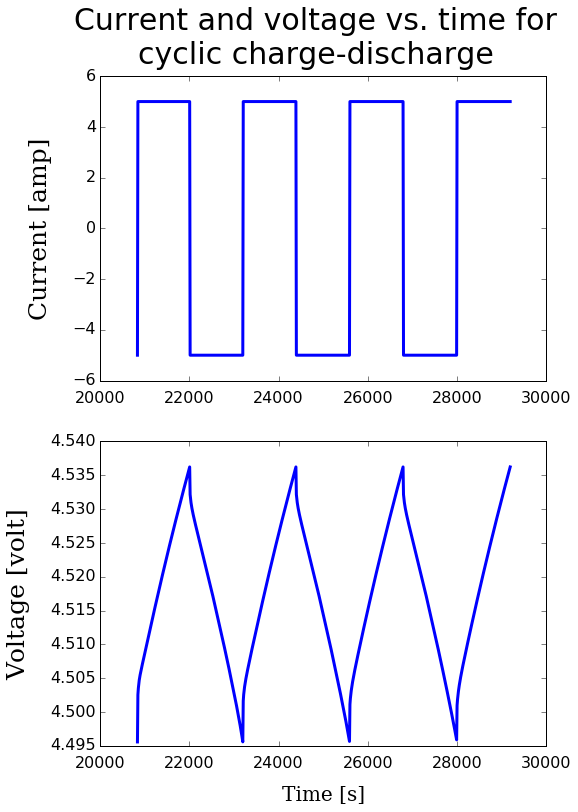

In [11]:

# get each dumped data and then plot it
dumped_data = load(open('data_dumps/stacked_c_dc6.dat', 'rb'))

# close to one cycle
cycle = int(len(dumped_data['time']) / 15) + 15

fig, ax = plt.subplots(nrows=2, figsize=(8, 12))
fig.suptitle('Current and voltage vs. time for\ncyclic charge-discharge',
             fontsize=30, fontname='sans-serif')
fig.gca().set_xlabel('Time [s]', fontsize=20, fontname='serif', labelpad=15)
ax[0].set_ylabel('Current [amp]', fontsize=25, fontname='serif', labelpad=20)
ax[1].set_ylabel('Voltage [volt]', fontsize=25, fontname='serif', labelpad=20)

for i in range (0, 2):
    ax[i].get_xaxis().set_tick_params(labelsize=16, length=5, pad=10)
    ax[i].get_yaxis().set_tick_params(labelsize=16, length=5)
    # print only last cycle
    x = dumped_data['time'][-4*cycle:]
    if i == 0:
        key = 'current'
    else:
        key = 'voltage'
    y = dumped_data[key][-4*cycle:]
    
    ax[i].plot(x, y, lw=3)

fig.subplots_adjust(wspace = 0.5)

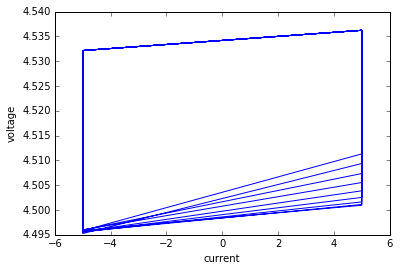

In [15]:
ax = plt.subplot(111)
ax.set_xlabel('current')
ax.set_ylabel('voltage')

data = load(open('data_dumps/stacked_c_dc6.dat', 'rb'))
x = data['current'][-2000:]
y = data['voltage'][-2000:]
ax.plot(x, y)